# Visualizing SAX

In this notebook you can find the SAX visualization on 

- (A) toy data from notebook 1.0,

- (B) FMRI data from notebook 1.1.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set()

from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
import numpy as np

def map_SAX_vocabulary(sax, vocabulary):
    unique_values = list(set(sax[0].ravel()))
    #print("Unique values:", unique_values)
    result = []
    for i, j in enumerate(sax[0].ravel()):
        #print("Evaluating timeseries item #{}: {}".format(i, j))
        x, = np.where(unique_values==j)
        #print("\tFetching SAX value #{}: {}".format(x[0], vocabulary[x[0]]))
        result.append(vocabulary[x[0]])
    return result

## Visualizing SAX representation of toy data


SAX representation: ['A', 'A', 'A', 'B', 'B', 'B', 'A', 'A', 'A']


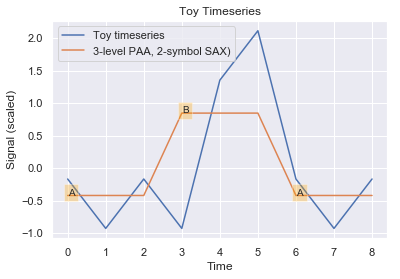

In [2]:
ts = [2,1,2,1,4,5,2,1,2]
# Scaling
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler.fit_transform(ts)[0].ravel()
# PAA
n_paa_segments = 3
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
paa_dataset_inv = paa.inverse_transform(paa.fit_transform(ts))[0].ravel()

# SAX words
n_sax_symbols = 2
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
sax_dataset_inv = sax.inverse_transform(sax.fit_transform(ts))
vocabulary = ['A', 'B']
SAX = map_SAX_vocabulary(sax_dataset_inv, vocabulary)
print()
print("SAX representation:", SAX)

sns.lineplot(x = list(range(len(ts))), y=ts, estimator=None, label="Toy timeseries")
sns.lineplot(x = list(range(len(paa_dataset_inv))), y=paa_dataset_inv, estimator=None, label="3-level PAA, 2-symbol SAX)")
plt.xlabel("Time")
plt.ylabel("Signal (scaled)")
plt.title("Toy Timeseries")
plt.legend()

# Annotate SAX word
for i, w in enumerate(SAX):
    if i == 0:
        plt.text(i, paa_dataset_inv[i], SAX[i], bbox=dict(facecolor='orange', alpha=0.3))
        current_letter = SAX[i]
    else:
        if w != current_letter:
            plt.text(i, paa_dataset_inv[i], SAX[i], bbox=dict(facecolor='orange', alpha=0.3))
            current_letter = SAX[i]

## Visualizing SAX representation of public data (FMRI)

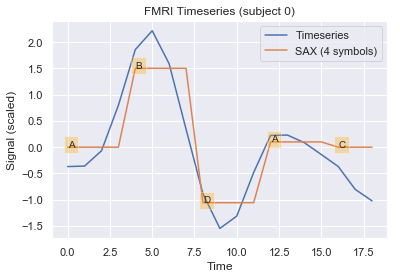

In [3]:
fmri = sns.load_dataset("fmri")
s0 = fmri[(fmri["subject"]=='s0') & (fmri["region"]=='frontal') & (fmri["event"]=='stim')].reset_index() # Subsetting subject 0 data

scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
s0['signal_scaled'] = scaler.fit_transform(s0['signal'].tolist())[0].ravel()

n_paa_segments = 4
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
s0["paa_dataset_inv"] = paa.inverse_transform(paa.fit_transform(s0['signal_scaled'].tolist()))[0].ravel()

n_sax_symbols = 4
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
sax_dataset_inv = sax.inverse_transform(sax.fit_transform(s0['signal_scaled'].tolist()))

vocabulary = ['A', 'B', 'C', 'D']
    
SAX = map_SAX_vocabulary(sax_dataset_inv, vocabulary)

sns.lineplot(x = "timepoint", y="signal_scaled", data=s0, estimator=None, label="Timeseries")
sns.lineplot(x = "timepoint", y="paa_dataset_inv", data=s0, estimator=None, label="SAX (4 symbols)")
plt.xlabel("Time")
plt.ylabel("Signal (scaled)")
plt.title("FMRI Timeseries (subject 0)")
plt.legend()

# Annotate SAX word
for i, w in enumerate(SAX):
    if i == 0:
        plt.text(i, s0.loc[i]["paa_dataset_inv"], SAX[i], bbox=dict(facecolor='orange', alpha=0.3))
        current_letter = SAX[i]
    else:
        if w != current_letter:
            plt.text(i, s0.loc[i]["paa_dataset_inv"], SAX[i], bbox=dict(facecolor='orange', alpha=0.3))
            current_letter = SAX[i]